Исходный ряд:
 [405 521 382 362 444 465 513 362 550 453 482 431 437 352 351 498 510 547
 477 428 458 470 499 418 477 468 545 441 543 474 321 438 409 451 462 541
 460 358 353 508 379 458 548 447 446 483 528 462 453 393 487 430 371 441
 495 510 496 525 377 512 382 480 391 448 540 421 453 441 452 476 464 449
 331 444 423 446 451 434 469 452 397 470 351 430 541 467 394 406 477 424
 475 352 391 482 453 465 458 482 448 411 452 504 454 422 443 510 448 442
 423 504 471 493 544 460]
Ранжированный ряд:
 [321 331 351 351 352 352 353 358 362 362 371 377 379 382 382 391 391 393
 394 397 405 406 409 411 418 421 422 423 423 424 428 430 430 431 434 437
 438 441 441 441 442 443 444 444 446 446 447 448 448 448 449 451 451 452
 452 452 453 453 453 453 454 458 458 458 460 460 462 462 464 465 465 467
 468 469 470 470 471 474 475 476 477 477 477 480 482 482 482 483 487 493
 495 496 498 499 504 504 508 510 510 510 512 513 521 525 528 540 541 541
 543 544 545 547 548 550]
Вариационный ряд - абсолютные частоты

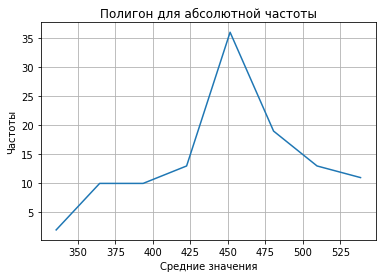

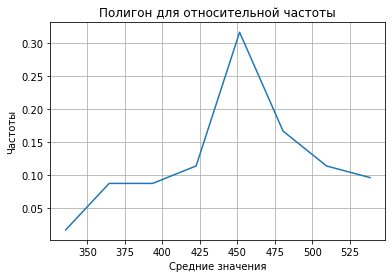

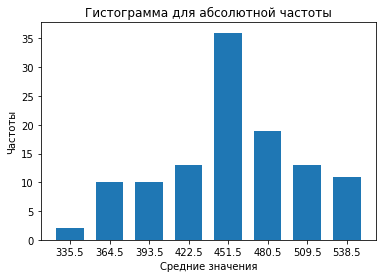

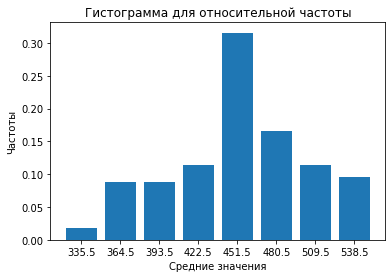

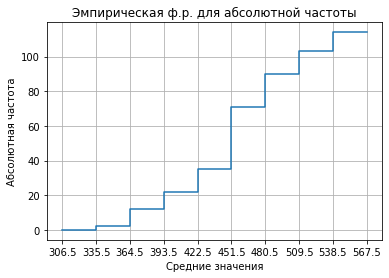

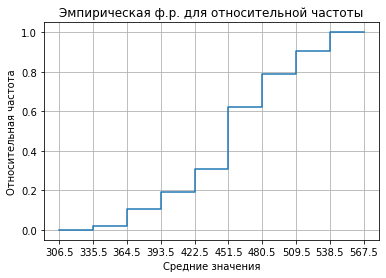

   Средние значения  Частоты  Условные варианты   nu1   nu2    nu3    nu4  \
0             335.5        2               -4.0  -8.0  32.0 -128.0  512.0   
1             364.5       10               -3.0 -30.0  90.0 -270.0  810.0   
2             393.5       10               -2.0 -20.0  40.0  -80.0  160.0   
3             422.5       13               -1.0 -13.0  13.0  -13.0   13.0   
4             451.5       36                0.0   0.0   0.0    0.0    0.0   
5             480.5       19                1.0  19.0  19.0   19.0   19.0   
6             509.5       13                2.0  26.0  52.0  104.0  208.0   
7             538.5       11                3.0  33.0  99.0  297.0  891.0   

   Проверка  
0     162.0  
1     160.0  
2      10.0  
3       0.0  
4      36.0  
5     304.0  
6    1053.0  
7    2816.0  
Условный эмпирический момент 1 порядка: 0.06140350877192982
Условный эмпирический момент 2 порядка: 3.026315789473684
Условный эмпирический момент 3 порядка: -0.6228070175438597
Ус

In [1]:
from lr2_x import x_middle, disp, sko, S2, N, spaces, spaces_abs_freq
import math
import pandas as pd
import numpy as np
from math import sqrt

In [2]:
from scipy import special

# функция Лапласа
def laplas(x):
    return special.erf(x/2**0.5)/2 

In [3]:
S = sqrt(S2)
print(pd.DataFrame({
    "Интервал": map(lambda x: "[{},{})".format(x[0], x[1]), spaces),
    "Середина": map(lambda x: ((x[0] + x[1]) / 2).round(2), spaces),
    "Частоты": spaces_abs_freq
}))
print("N: {}".format(N))
print("Матожидание: {}".format(x_middle))
print("Дисперсия: {}".format(disp))
print("СКО: {}".format(sko))
print("Исправленная дисперсия: {}".format(S2))
print("Исправленное СКО: {}".format(S))

    Интервал  Середина  Частоты
0  [321,350)     335.5        2
1  [350,379)     364.5       10
2  [379,408)     393.5       10
3  [408,437)     422.5       13
4  [437,466)     451.5       36
5  [466,495)     480.5       19
6  [495,524)     509.5       13
7  [524,553)     538.5       11
N: 114
Матожидание: 453.280701754386
Дисперсия: 2541.9606802092953
СКО: 50.417860726227715
Исправленная дисперсия: 2564.4559074677845
Исправленное СКО: 50.640457220169175


In [4]:
_gamma = 0.99
_t = 2.617
_t = S * _t / np.sqrt(N)
_i1 = x_middle - _t
_i2 = x_middle + _t
print("Для надежности {} и объема выборки n={} было выбрано значение t={} по приложению 6".format(_gamma, N, _t))
print("Доверительный интервал для матожидания: ({}, {})".format(_i1, _i2))

Для надежности 0.99 и объема выборки n=114 было выбрано значение t=12.412204295680766 по приложению 6
Доверительный интервал для матожидания: (440.8684974587052, 465.69290605006677)


In [5]:
_q = 0.198
_i1 = S * (1 - _q)
_i2 = S * (1 + _q)
print("Для надежности {} и объема выборки n={} было выбрано значение q={} по приложению 7".format(_gamma, N, _q))
print("Доверительный интервал для СКО: ({}, {})".format(_i1, _i2))

Для надежности 0.99 и объема выборки n=114 было выбрано значение q=0.198 по приложению 7
Доверительный интервал для СКО: (40.61364669057568, 60.66726774976267)


In [6]:
_x = list(map(lambda x: x[0], spaces))
_x.append(spaces[-1][1])
df = pd.DataFrame()
df['x_i'] = _x[:-1]
df['x_(i+1)'] = _x[1:]
df['n_i'] = spaces_abs_freq
df['z_i'] = df.iloc[:, 0].apply(lambda x: (x - x_middle) / S)
df['z_(i+1)'] = df.iloc[:, 1].apply(lambda x: (x - x_middle) / S)
df['F(z_i)'] = df.iloc[:, 3].apply(lambda x: laplas(x))
df['F(z_(i+1))'] = df.iloc[:, 4].apply(lambda x: laplas(x))
df['p_i'] = df.iloc[:, 5:7].apply(lambda x: x[1] - x[0], axis=1)
df['n_i1'] = df.iloc[:, 7].apply(lambda x: N * x)

df

,x_i,x_(i+1),n_i,z_i,z_(i+1),F(z_i),F(z_(i+1)),p_i,n_i1
0,321,350,2,-2.612155,-2.039490,-0.495501,-0.479299,0.016202,1.847017
1,350,379,10,-2.039490,-1.466825,-0.479299,-0.428788,0.050511,5.758279
2,379,408,10,-1.466825,-0.894161,-0.428788,-0.314382,0.114406,13.042305
3,408,437,13,-0.894161,-0.321496,-0.314382,-0.126083,0.188299,21.466121
4,437,466,36,-0.321496,0.251169,-0.126083,0.099158,0.225241,25.677459
5,466,495,19,0.251169,0.823833,0.099158,0.294983,0.195825,22.324017
6,495,524,13,0.823833,1.396498,0.294983,0.418718,0.123735,14.105771
7,524,553,11,1.396498,1.969163,0.418718,0.475533,0.056815,6.476919


In [7]:
df1 = pd.DataFrame()

df1['n_i'] = spaces_abs_freq
df1['n_i1'] = df['n_i1']
df1['(n_i - n_i1)^2 / n_i1'] = df1.iloc[:, :].apply(lambda x: (x[0] - x[1])**2 / x[1], axis=1)

X2_seen = df1.iloc[:,2].sum()

print("X2_наб = {}".format(X2_seen))
print("Число стееней свободы k = {} - 3 = {}".format(len(spaces), len(spaces)-3))
print("Для числа степеней свободы 5 X_крит = {}".format(11.07))
df1


X2_наб = 15.075911303606404
Число стееней свободы k = 8 - 3 = 5
Для числа степеней свободы 5 X_крит = 11.07


,n_i,n_i1,(n_i - n_i1)^2 / n_i1
0,2,1.847017,0.012671
1,10,5.758279,3.124579
2,10,13.042305,0.709661
3,13,21.466121,3.338992
4,36,25.677459,4.149743
5,19,22.324017,0.494942
6,13,14.105771,0.086683
7,11,6.476919,3.158640
